This assignmment is based on 4th class ( EDA and Data Preparation ) and 5th Class ( Feature Engineering)

##before do your assignment, please make sure to **make a copy** on it

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = sns.load_dataset('planets')
df.head(5)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
df.describe() # cek statistik

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [ ]:
df.info() #cek data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


##1. Berdasarkan data describe diatas, manakah feature yang termasuk ke distribusi yang tidak normal?

Jawab : orbital_period, mass dan distance

##2. Tampilkan lah nilai NULL dan NaN dan Jumlahkan ada berapa per masing masing feature

In [ ]:
missing_df = pd.DataFrame({
    'Feature': df.columns,
    'Jumlah NaN': df.isna().sum(),
    'Persentase (%)': (df.isna().sum() / len(df)) * 100
})

missing_df = missing_df[missing_df['Jumlah NaN'] > 0].reset_index(drop=True)

print(missing_df)

          Feature  Jumlah NaN  Persentase (%)
0  orbital_period          43        4.154589
1            mass         522       50.434783
2        distance         227       21.932367


##3. Buatlah visualisasi data yang memiliki distribusi tidak normal dan data yang memiliki outlier menggunakan matplotlib.boxplot

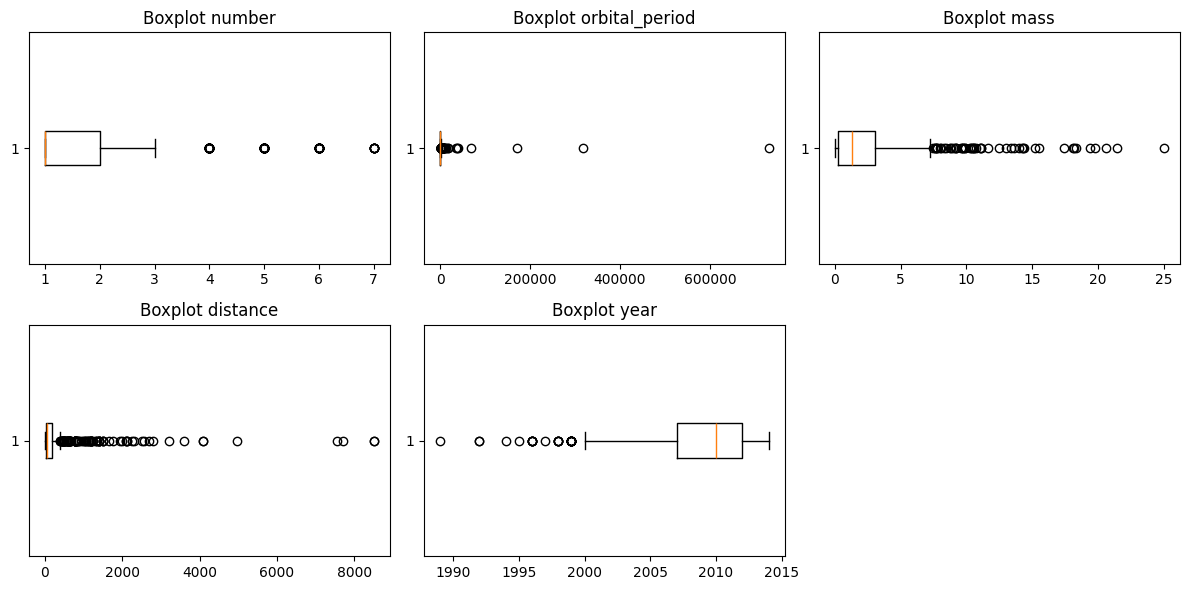

In [ ]:
df = sns.load_dataset('planets')

numerical_features = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_features.columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

##4. Coba encoding data kategorik pada feature 'method' dengan metode apa saja dan berikan alasan mu kenapa pakai metode itu


Jumlah Nilai NaN per Fitur:
          Feature  Jumlah NaN  Persentase (%)
0  orbital_period          43        4.154589
1            mass         522       50.434783
2        distance         227       21.932367


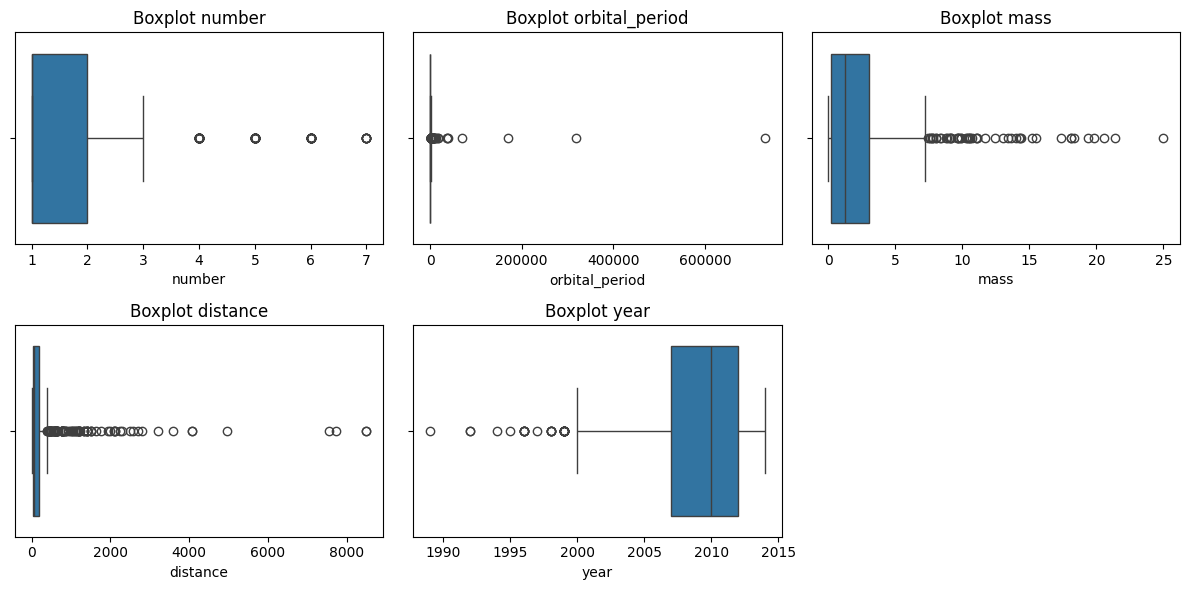


Data setelah encoding fitur 'method':
            method  method_encoded
0  Radial Velocity               7
1  Radial Velocity               7
2  Radial Velocity               7
3  Radial Velocity               7
4  Radial Velocity               7


In [ ]:
# Load dataset
df = sns.load_dataset('planets')

missing_df = pd.DataFrame({
    'Feature': df.columns,
    'Jumlah NaN': df.isna().sum(),
    'Persentase (%)': (df.isna().sum() / len(df)) * 100
})
missing_df = missing_df[missing_df['Jumlah NaN'] > 0].reset_index(drop=True)
print("Jumlah Nilai NaN per Fitur:")
print(missing_df)

numerical_features = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot {feature}")

plt.tight_layout()
plt.show()

df['method_encoded'] = df['method'].astype('category').cat.codes
print("\nData setelah encoding fitur 'method':")
print(df[['method', 'method_encoded']].head())

##5. Tampilkan nilai NULL ( nilai yang hilang) dan bagaimana cara mu untuk

*   List item

*   List item
*   List item


*   List item

handling NULL Values.

In [ ]:
missing_df = pd.DataFrame({
    'Feature': df.columns,
    'Jumlah NaN': df.isna().sum(),
    'Persentase (%)': (df.isna().sum() / len(df)) * 100
})
missing_df = missing_df[missing_df['Jumlah NaN'] > 0].reset_index(drop=True)

print("Jumlah Nilai NaN per Fitur:")
print(missing_df)

df_handled = df.copy()

num_features = df_handled.select_dtypes(include=['number']).columns
df_handled[num_features] = df_handled[num_features].fillna(df_handled[num_features].median())

cat_features = df_handled.select_dtypes(include=['object']).columns
df_handled[cat_features] = df_handled[cat_features].fillna(df_handled[cat_features].mode().iloc[0])

threshold = len(df) * 0.5
df_handled = df_handled.dropna(thresh=threshold, axis=1)

print("\nDataset setelah handling missing values:")
print(df_handled.isna().sum())

Jumlah Nilai NaN per Fitur:
          Feature  Jumlah NaN  Persentase (%)
0  orbital_period          43        4.154589
1            mass         522       50.434783
2        distance         227       21.932367

Dataset setelah handling missing values:
method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
method_encoded    0
dtype: int64


##6. Scaling feature numerik 'number','orbital_period','mass','distance','year' dengan salah satu metode ini ( Simple feature scaling, MinMax Scaling, StandardScaler, Robust Scaler ), dan berikan alasannya

In [ ]:
from sklearn.preprocessing import MinMaxScaler

num_features = ['number', 'orbital_period', 'mass', 'distance', 'year']

scaler = MinMaxScaler()

df_scaled = df.copy()
df_scaled[num_features] = scaler.fit_transform(df[num_features])

print("Data setelah MinMax Scaling:")
print(df_scaled.head())

##7. Tentukan target yang ingin di prediksi dan feature nya, lalu buat lah train and test.

In [ ]:
from sklearn.model_selection import train_test_split

target = 'mass'
features = ['number', 'orbital_period', 'distance', 'year', 'method_encoded']

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))

Jumlah data train: 828
Jumlah data test: 207
